In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import optimizers
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras import Model, layers

import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import numpy as np
import os

Using TensorFlow backend.


In [2]:
path = "flowers/"

In [3]:
glob(path + "/*")

['flowers\\daisy',
 'flowers\\dandelion',
 'flowers\\rose',
 'flowers\\sunflower',
 'flowers\\tulip']

In [4]:
numberOfClass = len(glob(path + "/*"))

print(numberOfClass)

5


In [5]:
res_net = InceptionResNetV2(include_top = True, weights = "imagenet")

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
print(res_net.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [7]:
res_net.layers.pop()

In [8]:
res_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [9]:
res_net_layer_list = res_net.layers

res_net_layer_list

In [10]:
model = Sequential()

In [11]:
model_input = layers.Input(shape=(224,224,3))

x = res_net(model_input)

x = layers.Dense(512, activation='relu')(x) 

x = layers.Dropout(0.5)(x)

predictions = layers.Dense(numberOfClass, activation='softmax')(x)

model = Model(model_input, predictions)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = optimizers.Adam(lr=0.0001),
              metrics = ["accuracy"])

In [13]:
batch_size = 8

In [14]:
image_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    rotation_range=45,
                                    validation_split=0.3)

In [15]:
train_data_gen = image_data_gen.flow_from_directory(directory=path,
                                                    target_size = (224,224),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode = 'sparse',
                                                    subset='training')

Found 3028 images belonging to 5 classes.


In [16]:
test_data_gen = image_data_gen.flow_from_directory(directory=path,
                                                   target_size = (224,224),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode = 'sparse',
                                                   subset='validation')

Found 1295 images belonging to 5 classes.


In [17]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

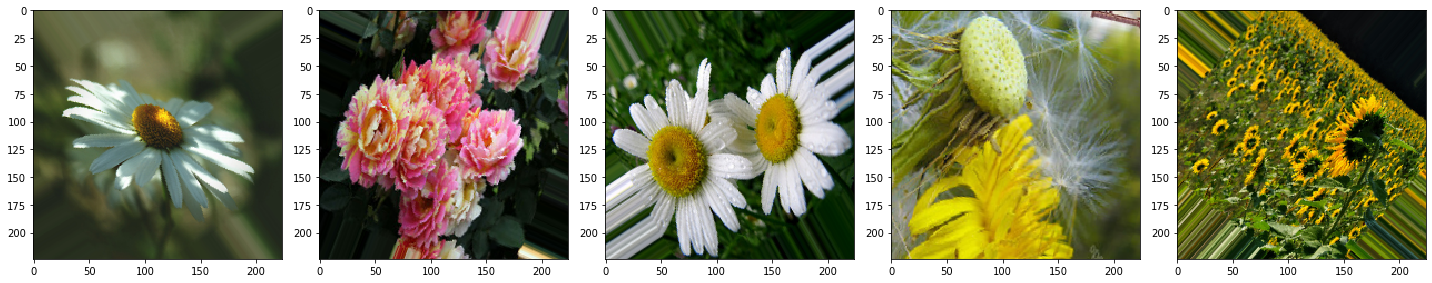

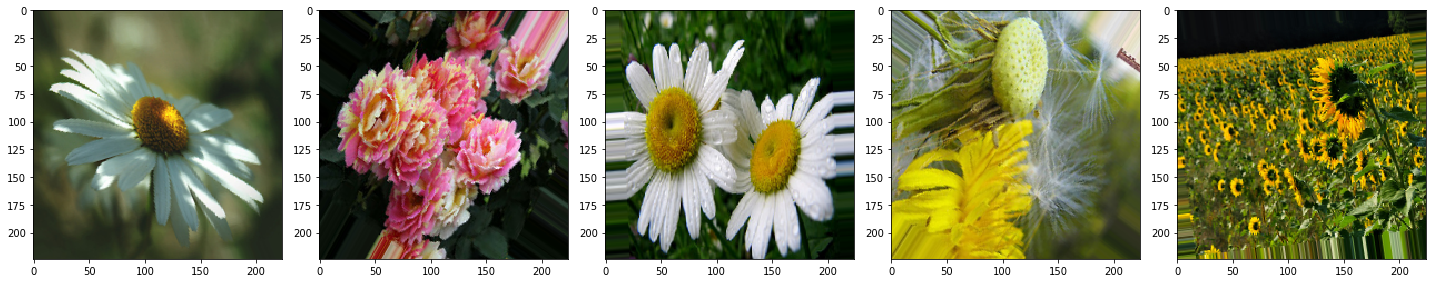

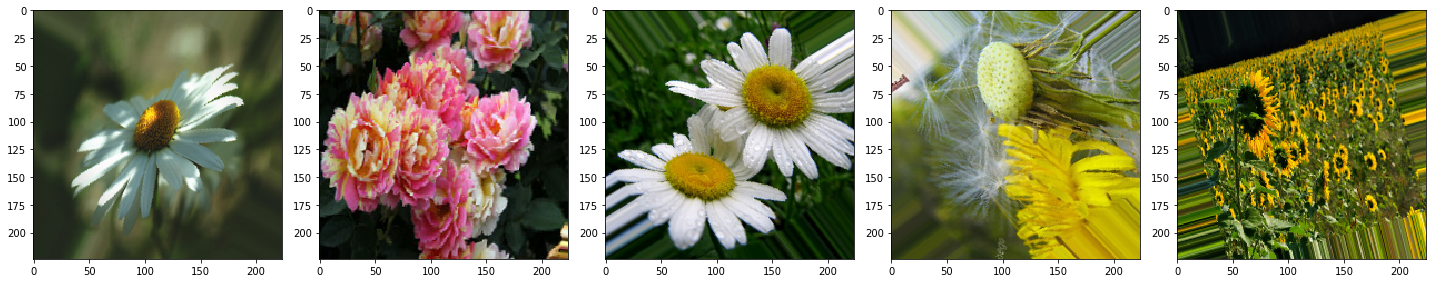

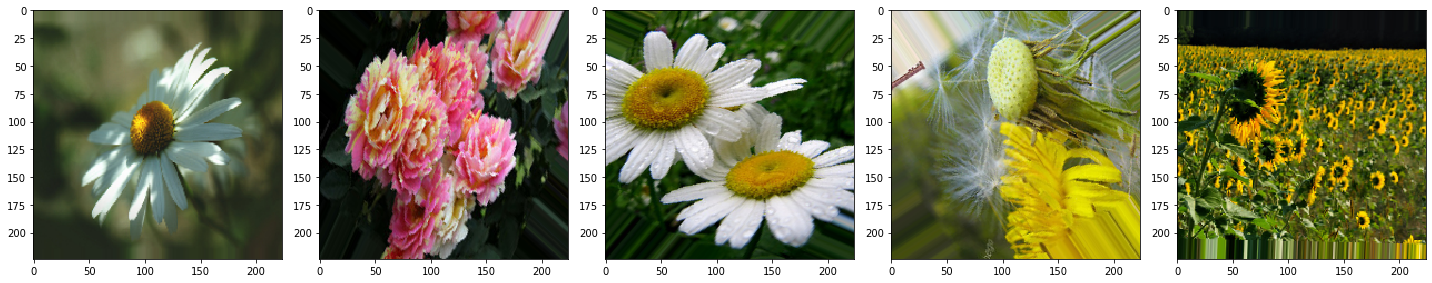

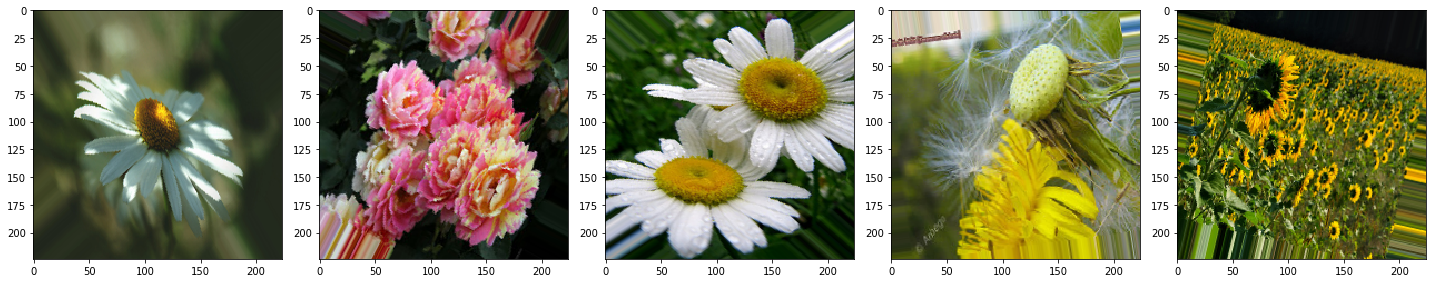

In [18]:
for i in range(5):
    augmented_images = [train_data_gen[i][0][i] for i in range(5)]
    plotImages(augmented_images)

In [19]:
hist = model.fit_generator(train_data_gen,
                           steps_per_epoch=train_data_gen.n//batch_size,
                           epochs= 20,
                           validation_data=test_data_gen,
                           validation_steps= test_data_gen.n//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
378/378 [==============================] - 319s 845ms/step - loss: 1.4901 - acc: 0.5592 - val_loss: 1.3753 - val_acc: 0.6491
Epoch 2/20
378/378 [==============================] - 263s 696ms/step - loss: 1.1665 - acc: 0.7123 - val_loss: 1.1842 - val_acc: 0.5789
Epoch 3/20
378/378 [==============================] - 274s 725ms/step - loss: 0.8990 - acc: 0.7487 - val_loss: 0.7808 - val_acc: 0.7809
Epoch 4/20
378/378 [==============================] - 271s 717ms/step - loss: 0.6689 - acc: 0.8185 - val_loss: 0.6767 - val_acc: 0.8151
Epoch 5/20
378/378 [==============================] - 273s 722ms/step - loss: 0.5549 - acc: 0.8456 - val_loss: 0.5310 - val_acc: 0.8539
Epoch 6/20
378/378 [==============================] - 273s 723ms/step - loss: 0.4975 - acc: 0.8644 - val_loss: 0.5637 - val_acc: 0.8298
Epoch 7/20
378/378 [==============================] - 275s 727ms/step - loss: 0.4241 - acc: 0.8786 - val_loss: 0.4401 - val_acc: 0.8609


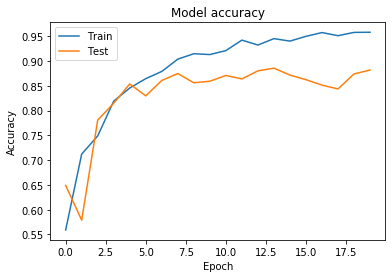

In [20]:
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

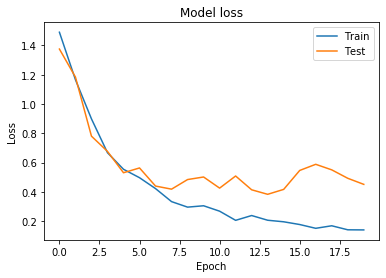

In [21]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()